In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r"F:\Data_Science_Jupyter_Files\FuelConsumptionCo2.csv")

In [5]:
df.sample(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
353,2014,FORD,EDGE,SUV - SMALL,3.5,6,AS6,X,12.6,8.7,10.8,26,248
121,2014,BMW,M6,COMPACT,4.4,8,M6,Z,16.2,10.9,13.8,20,317
105,2014,BMW,640i xDRIVE GRAN COUPE,COMPACT,3.0,6,A8,Z,11.9,8.0,10.1,28,232
161,2014,CADILLAC,ATS AWD,COMPACT,3.6,6,AS6,X,13.1,9.0,11.3,25,260
423,2014,FORD,TAURUS AWD,FULL-SIZE,3.5,6,AS6,X,13.7,9.4,11.8,24,271


In [7]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [13]:
df=df.drop(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE'], axis=1)

In [14]:
df.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


In [16]:
df=df.drop(["CYLINDERS", "FUELCONSUMPTION_CITY", "FUELCONSUMPTION_HWY", "FUELCONSUMPTION_COMB"], axis=1)

In [17]:
df.head()

,ENGINESIZE,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,33,196
1,2.4,29,221
2,1.5,48,136
3,3.5,25,255
4,3.5,27,244


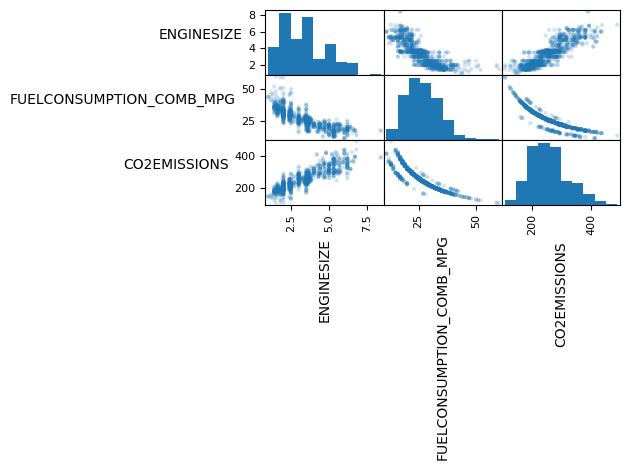

In [18]:
# To help with selecting predictive features that are not redundant, consider the following scatter matrix,
# which shows the scatter plots for each pair of input features. The diagonal of the matrix shows each feature's histogram.

axes = pd.plotting.scatter_matrix(df, alpha=0.2)
# need to rotate axis labels so we can read them
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

In [20]:
# Extract the required columns and convert the resulting dataframes to NumPy arrays.

X = df.iloc[:,[0, 1]].to_numpy()
y = df.iloc[:, [2]].to_numpy()

In [21]:
#You should standardize your input features so the model doesn't inadvertently favor any feature due to its magnitude. 
# The typical way to do this is to subtract the mean and divide by the standard deviation. Scikit-learn can do this for you.

from sklearn import preprocessing

std_scaler = preprocessing.StandardScaler()
X_std = std_scaler.fit_transform(X)

In [22]:
pd.DataFrame(X_std).describe().round(2)

,0,1
count,1067.00,1067.00
mean,0.00,-0.00
std,1.00,1.00
min,-1.66,-2.07
25%,-0.95,-0.73
50%,0.04,-0.06
75%,0.67,0.61
max,3.57,4.50


In [23]:
# Randomly split your data into train and test sets, using 80% of the dataset for training and reserving the remaining 20% for testing.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.20, random_state=42)

### Build a multiple linear regression model

In [24]:
from sklearn import linear_model

regressor = linear_model.LinearRegression()

regressor.fit(X_train, y_train)

coef_ = regressor.coef_
intercept_ = regressor.intercept_

print("Coefficient: ", coef_)
print("Intercept: ", intercept_)

Coefficient:  [[ 25.27339614 -37.4381472 ]]
Intercept:  [256.29072488]


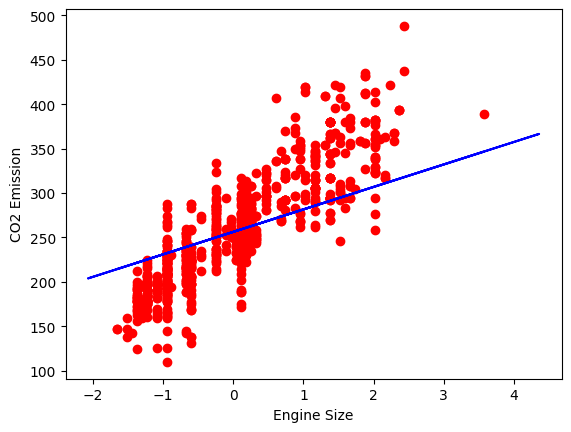

In [25]:
plt.scatter(X_train[:,0], y_train, color="red")
plt.plot(X_train, coef_[0,0] * X_train + intercept_[0], "-b" )
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emission")
plt.show()

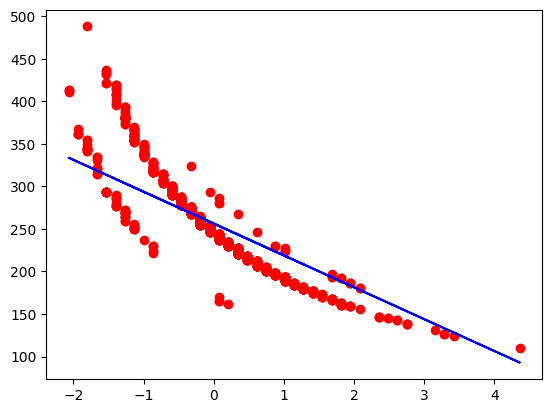

In [31]:
plt.scatter(X_train[:, 1], y_train, color="red")
plt.plot(X_train[:, 1], coef_[0, 1] * X_train[:, 1] + intercept_[0], "-b")
plt.show()